# Campus Recruitment Analysis by Ishika Tailor
# 180280116118

Introduction

This data set consists of Placement data of students in a XYZ campus. Its include salary offers, status of placed or non-placed, marks of hsc and ssc board of all students and degree specialization.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [4]:
address = 'Desktop/Placement_Data_Full_Class.csv'
data = pd.read_csv(address)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


--> Total number of column= 15,  Numeric column=(int64)=1,(float64)=6    , Text columns=(object)=8

In [5]:
data.reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1. Getting Overview of each columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


215 entries and total 15 attributes

In [4]:
data.describe(include=['object'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [6]:
data.describe(include=['float'])

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# 2. Let's find unique value of object columns

In [27]:
data_2=data[['gender','status','ssc_b','hsc_b','degree_t','workex','specialisation']]
for col in data_2:
        print(col+" has this unique value:")
        print(data_2[col].unique())

gender has this unique value:
['M' 'F']
status has this unique value:
['Placed' 'Not Placed']
ssc_b has this unique value:
['Others' 'Central']
hsc_b has this unique value:
['Others' 'Central']
degree_t has this unique value:
['Sci&Tech' 'Comm&Mgmt' 'Others']
workex has this unique value:
['No' 'Yes']
specialisation has this unique value:
['Mkt&HR' 'Mkt&Fin']


# 3. Counting unique value of each column

In [36]:
for col in data_2:
     print(data_2[col].value_counts().to_frame())
   

   gender
M     139
F      76
            status
Placed         148
Not Placed      67
         ssc_b
Central    116
Others      99
         hsc_b
Others     131
Central     84
           degree_t
Comm&Mgmt       145
Sci&Tech         59
Others           11
     workex
No      141
Yes      74
         specialisation
Mkt&Fin             120
Mkt&HR               95


In [40]:
status=data['status'].value_counts().to_frame()
status.rename(columns={'status': 'value_counts'}, inplace=True)
status.index.name='status-unique-value'
status


,value_counts
status-unique-value,
Placed,148
Not Placed,67


In [41]:
ssc_b=data['ssc_b'].value_counts().to_frame()
ssc_b.rename(columns={'ssc_b': 'value_counts'}, inplace=True)
ssc_b.index.name='ssc_b-unique-value'
ssc_b

,value_counts
ssc_b-unique-value,
Central,116
Others,99


In [43]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [45]:
data.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [46]:
data.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [48]:
data.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

# 4. This represents min and max value according to degree.

In [60]:
data.pivot_table(index='degree_t',aggfunc=[np.max,np.min])

amax                                                         \
          degree_p etest_p gender   hsc_b hsc_p    hsc_s  mba_p    salary   
degree_t                                                                    
Comm&Mgmt     85.0    97.0      M  Others  97.0  Science  77.89  940000.0   
Others        78.0    88.0      M  Others  86.0  Science  71.96  360000.0   
Sci&Tech      91.0    98.0      M  Others  97.7  Science  76.26  690000.0   

                                ...   amin                                   \
          sl_no specialisation  ...  hsc_p     hsc_s  mba_p    salary sl_no   
degree_t                        ...                                           
Comm&Mgmt   215         Mkt&HR  ...  40.00      Arts  51.29  200000.0     3   
Others      199         Mkt&HR  ...  37.00      Arts  51.21  240000.0    35   
Sci&Tech    212         Mkt&HR  ...  42.16  Commerce  51.58  200000.0     1   

                                                             
          specialisation    ssc_b  ssc_p      status workex  
degree_t                                                     
Comm&Mgmt        Mkt&Fin  Central  40.89  Not Placed     No  
Others           Mkt&Fin  Central  49.00  Not Placed     No  
Sci&Tech         Mkt&Fin  Central  49.00  Not Placed     No  

[3 rows x 28 columns]

In [69]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [50]:
data.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [42]:
df=data[['status','gender','specialisation']]
df_group=df.groupby(['specialisation','status']).count()
df_group.head()

gender
specialisation status            
Mkt&Fin        Not Placed      25
               Placed          95
Mkt&HR         Not Placed      42
               Placed          53

For perticular specialisation, we can see that 1.Mk&Fin=95 students placed and 2.Mkt&HR=53 students placed.

In [47]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [53]:
data_3=data[['gender','status']]
df=data_3.groupby('gender').count()
df.head()

,status
gender,
F,76
M,139


# 5. Visualizing data

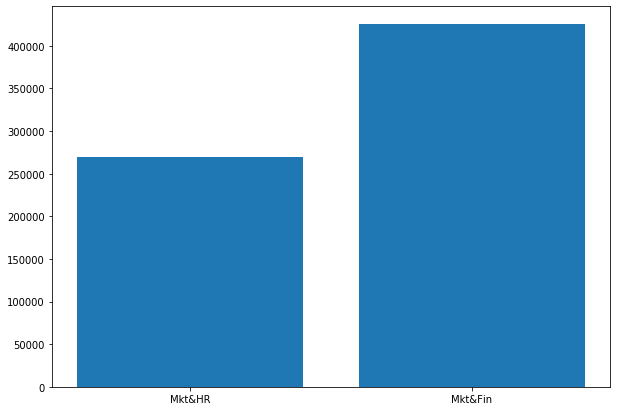

In [54]:
from matplotlib import pyplot as plt 
df = pd.DataFrame(data) 
  
course = df['specialisation'].head(12) 
salary = df['salary'].head(12) 
  
fig = plt.figure(figsize =(10, 7)) 
plt.bar(course[0:10], salary[0:10]) 
plt.show()

We can analyse that marketing and finance has high salary.

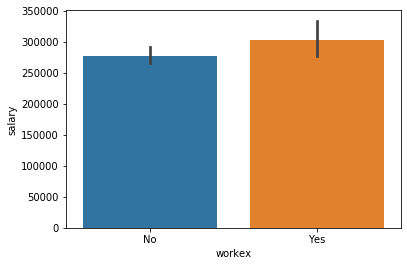

In [74]:
import seaborn as sns
sns.barplot(x="workex",y="salary",data=data)

Here, who has work experience, he/she has high salary! but there is very minor changes. Its not affect more on salary if he/she has no work-experince

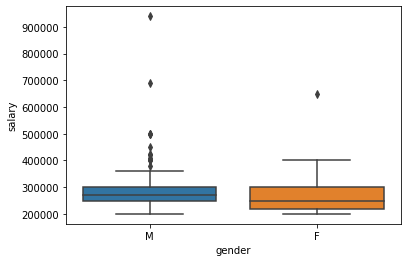

In [68]:
sns.boxplot(x="gender",y="salary",data=data)

here, many outliers in case of Male, so male has high salary than female

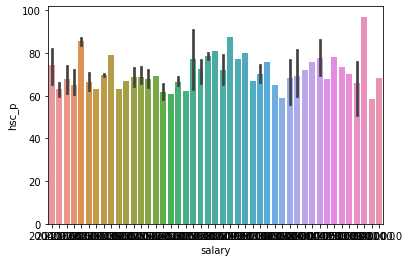

In [70]:
sns.barplot(x="salary",y="hsc_p",data=data)

# Conclusion:

#We can say that Marketing and Finance is a famous field and have high chances to getting place with high package.
#The salary for male is high than female.
#The avarage salary is more if you have work-experince but its not affect more on salary package.